# Scikit learn

tutorial homepage
https://scikit-learn.org/stable/tutorial/index.html




### Import the packages

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
import sklearn.neighbors as nei
import sklearn.model_selection as mod
import seaborn as sns

In [9]:
plt.rcParams['figure.figsize'] = (15,10)
plt.style.use('ggplot')

### importing and chcking the iris data set

In [10]:
df = pd.read_csv("https://raw.githubusercontent.com/ianmcloughlin/datasets/main/iris.csv")

In [11]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [13]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


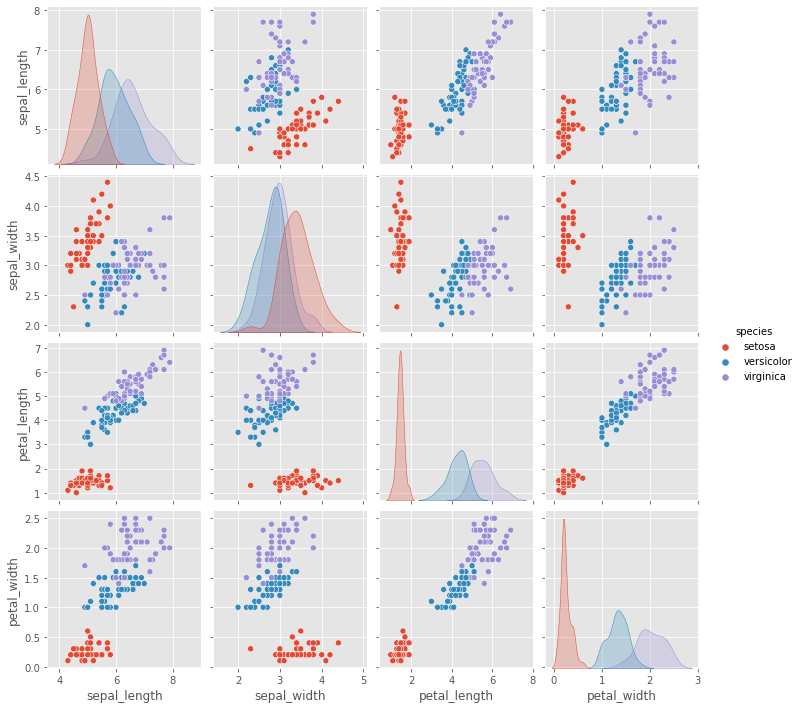

In [14]:
sns.pairplot(df,hue = 'species')

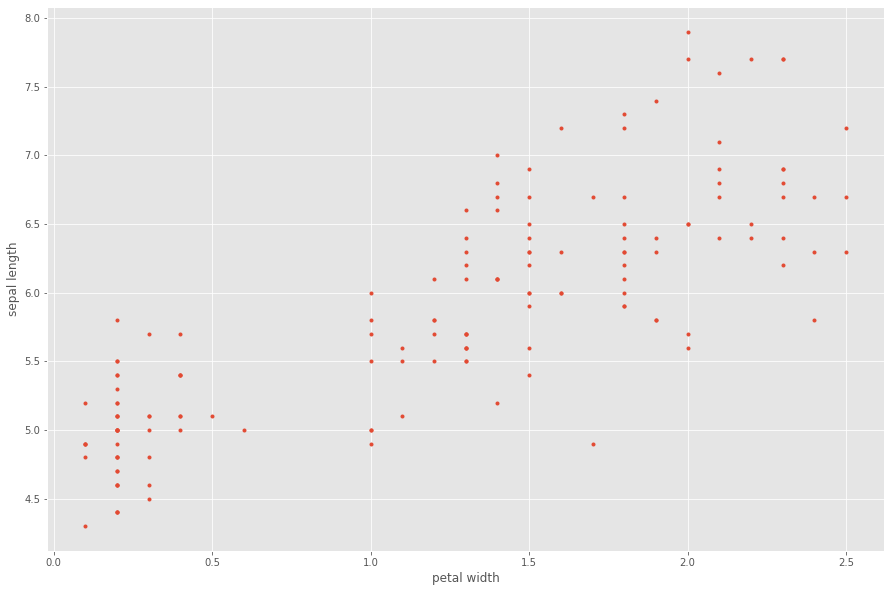

In [15]:
fig, ax = plt.subplots()
ax.plot(df['petal_width'],df['sepal_length'],'.')

ax.set_xlabel('petal width');
ax.set_ylabel('sepal length');

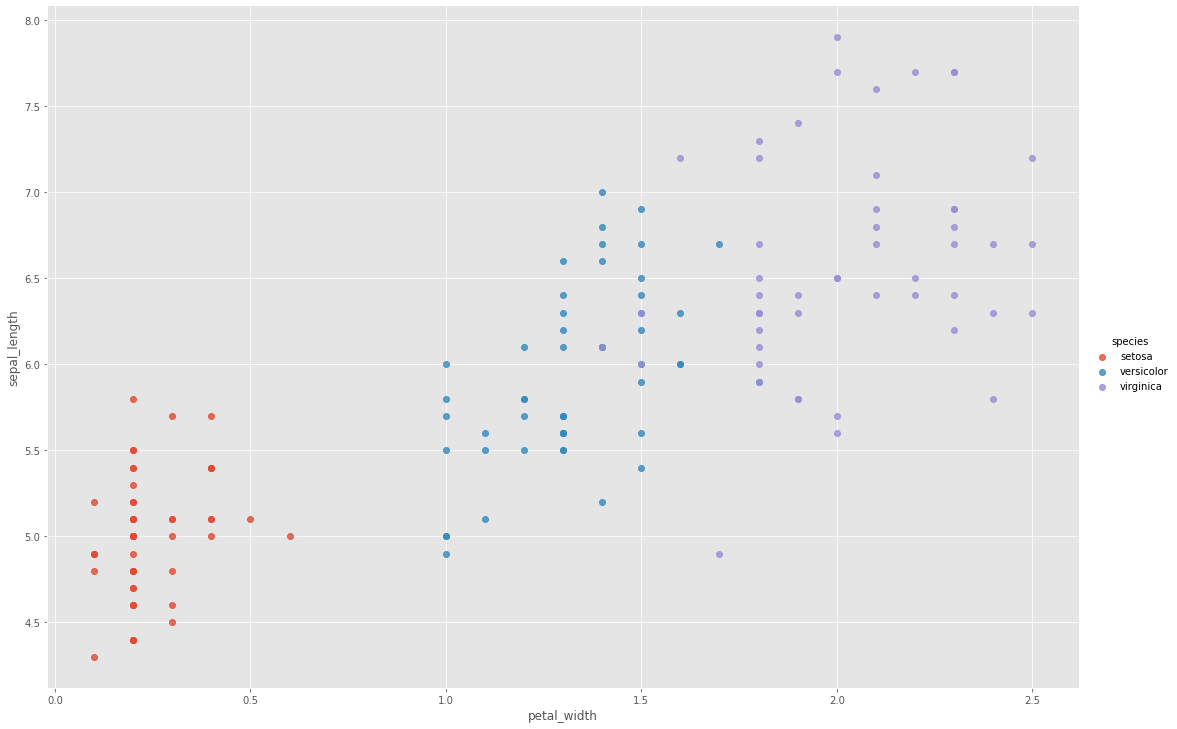

In [16]:
sns.lmplot(x="petal_width", y="sepal_length",hue='species',data=df,fit_reg=False,height=10,aspect=1.5)

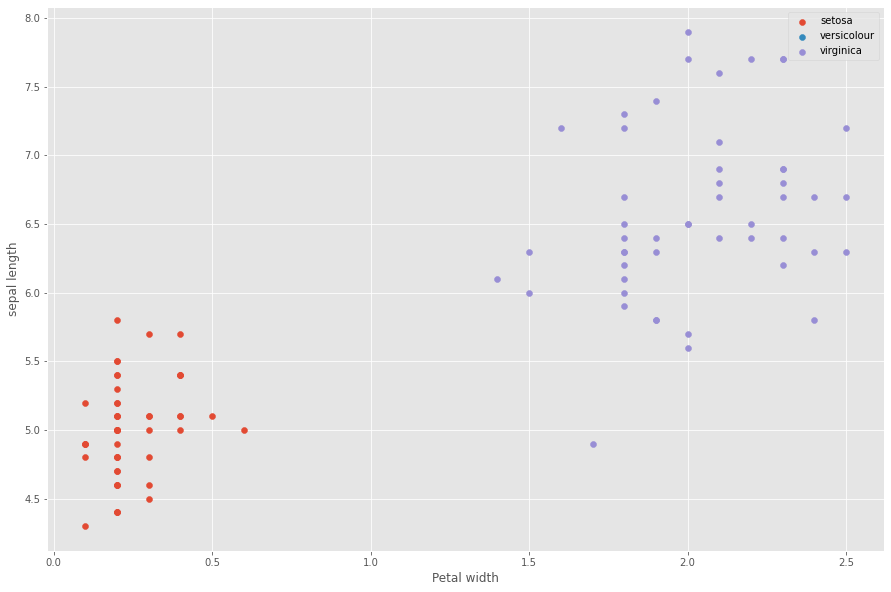

In [27]:
setos = df[df['species']=='setosa']
versi = df[df['species']=='versicolour']
virgi = df[df['species']=='virginica']

fig, ax =plt.subplots()

ax.scatter(setos['petal_width'],setos['sepal_length'],label='setosa')
ax.scatter(versi['petal_width'],versi['sepal_length'],label='versicolour')
ax.scatter(virgi['petal_width'],virgi['sepal_length'],label='virginica')

ax.set_xlabel('Petal width')
ax.set_ylabel('sepal length')
ax.legend();

In [31]:
df[df['species']=='virginica'].head()

,sepal_length,sepal_width,petal_length,petal_width,species
100,6.3,3.3,6.0,2.5,virginica
101,5.8,2.7,5.1,1.9,virginica
102,7.1,3.0,5.9,2.1,virginica
103,6.3,2.9,5.6,1.8,virginica
104,6.5,3.0,5.8,2.2,virginica


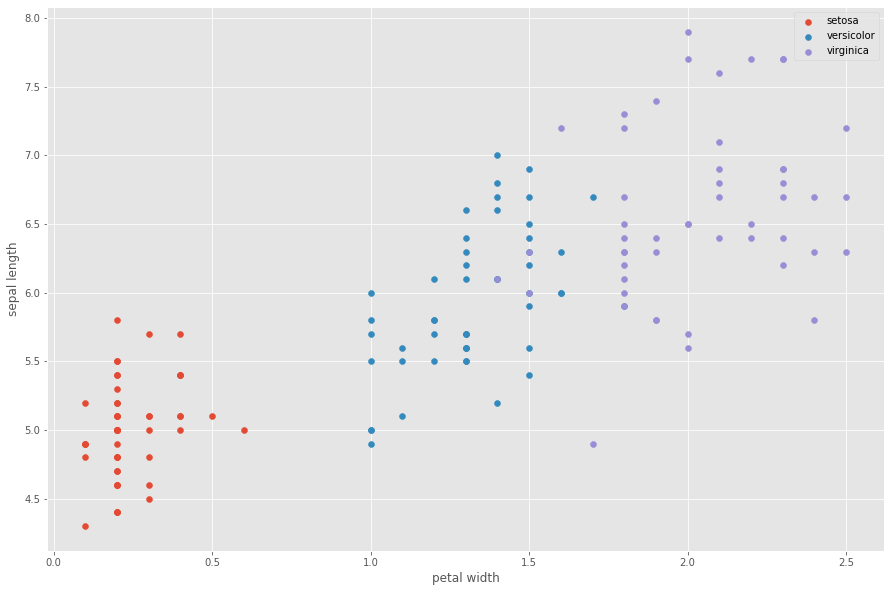

In [32]:
fig, ax =plt.subplots()

for species, data in df.groupby('species'):
    ax.scatter(data['petal_width'], data['sepal_length'], label=species)
    
ax.set_xlabel('petal width')
ax.set_ylabel('sepal length')
ax.legend();

In [58]:
x= df.groupby('species')
x

In [52]:
x.mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [53]:
y= df.groupby('sepal_length')

In [55]:
y.std()

,sepal_width,petal_length,petal_width
sepal_length,,,
4.3,NaN,NaN,NaN
4.4,0.152753,0.057735,0.000000
4.5,NaN,NaN,NaN
4.6,0.221736,0.221736,0.050000
4.7,0.000000,0.212132,0.000000
4.8,0.204939,0.204939,0.070711
4.9,0.326599,1.309071,0.671317
5.0,0.543241,0.834266,0.326769
5.1,0.411636,0.504425,0.282843


In [57]:
for i,j in (x+y):
    print()
    print(f"j is: '{i}'")
    print(f"j looks like:\n{j[0:3]}")
    print()

TypeError: unsupported operand type(s) for +: 'DataFrameGroupBy' and 'DataFrameGroupBy'